In [1]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

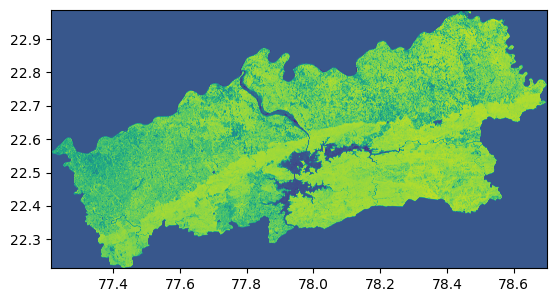

<Axes: >

In [2]:
img=rasterio.open('./Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif')
show(img)

In [129]:
print(img.bounds)

BoundingBox(left=77.21280378439681, bottom=22.213360682650706, right=78.69879692738732, top=22.987169468391258)


In [3]:
full_img=img.read()

In [4]:
full_img.shape

(12, 8614, 16542)

In [5]:
num_bands=img.count
print("Number of bands = ",num_bands)

Number of bands =  12


In [7]:
bands={}

In [8]:
for i in range(1,13):
    bands[f"band_{i}"]=img.read(i)

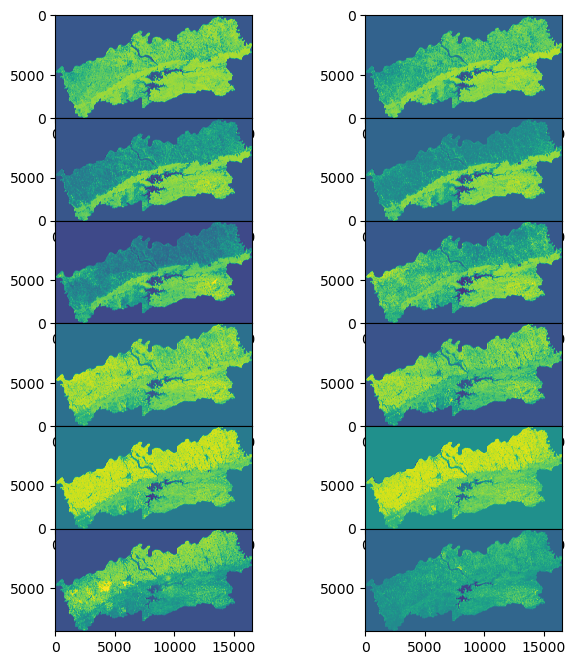

In [19]:
#Set up the figure and axes
fig, axs = plt.subplots(6, 2,figsize=(8, 8))

# Loop through the images and display them in the grid
for i in range(6):
    for j in range(2):
        axs[i, j].imshow(bands[f"band_{i*2+j+1}"])
        #axs[i, j].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.0005, hspace=0.0005)

# Display the grid of images
plt.show()

In [21]:
print("Coordinate Reference System = ",img.crs)

Coordinate Reference System =  GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]


In [23]:
print("Metadata = ",img.meta)

Metadata =  {'driver': 'GTiff', 'dtype': 'int16', 'nodata': 32767.0, 'width': 16542, 'height': 8614, 'count': 12, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(8.983152841195193e-05, 0.0, 77.21280378439681,
       0.0, -8.983152841195176e-05, 22.987169468391258)}


In [24]:
print("Description = ",img.descriptions)

Description =  (None, None, None, None, None, None, None, None, None, None, None, None)


In [25]:
import rasterio
import geopandas as gpd

# Path to the TIFF file
tif_path = './Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23/Hoshangabad_MP_NDVI_oct1FN-mar2FN_2022-23.tif'

# Read the TIFF file using rasterio
with rasterio.open(tif_path) as src:
    # Read the raster data
    raster_data = src.read(1)

    # Get the spatial transform (georeferencing information)
    transform = src.transform

# Create a GeoDataFrame with the raster data
geometry = [src.xy(r, c) for r in range(src.height) for c in range(src.width)]
gdf = gpd.GeoDataFrame({'value': raster_data.flatten()}, geometry=geometry, crs=src.crs)

# Set the GeoDataFrame's geometry type as Point
gdf.geometry = gdf.geometry.apply(lambda xy: gpd.points_from_xy(xy[0], xy[1]))

# Apply the spatial transform to the GeoDataFrame
gdf['geometry'] = gdf['geometry'].apply(lambda point: point[0].coords[0])

# Display the GeoDataFrame
print(gdf.head())


TypeError: Input must be valid geometry objects: (77.21284870016102, 22.98712455262705)

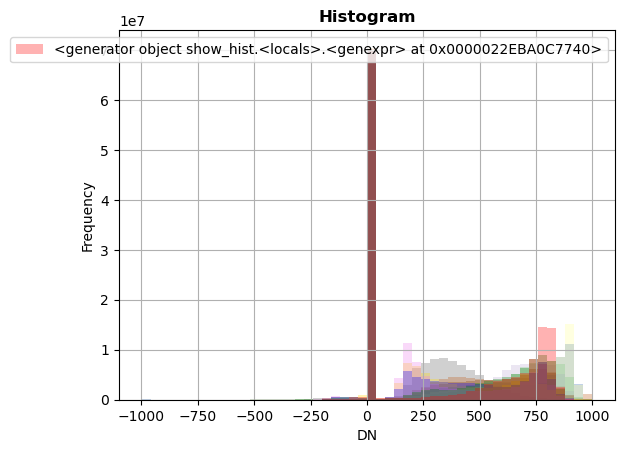

In [28]:
# Band4 -Red, Band8-NIR
rasterio.plot.show_hist(full_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

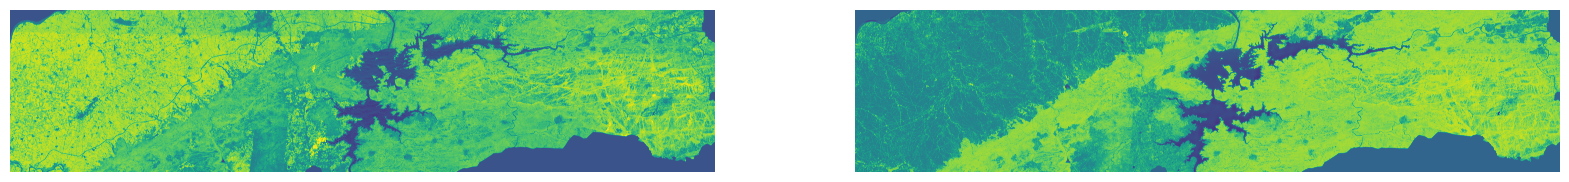

In [98]:
clipped_img=full_img[:,4000:7000:,1500:14543]

# Set the figure size
fig = plt.figure(figsize=(20, 100))

# Display the first image in the left subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(clipped_img[7,:,:])
ax1.axis('off')

# Display the second image in the right subplot
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(clipped_img[3,:,:])
ax2.axis('off')

# Show the figure with larger images
plt.show()


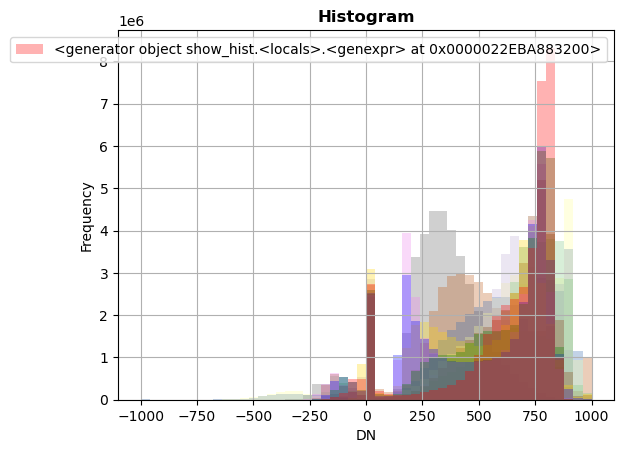

In [99]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

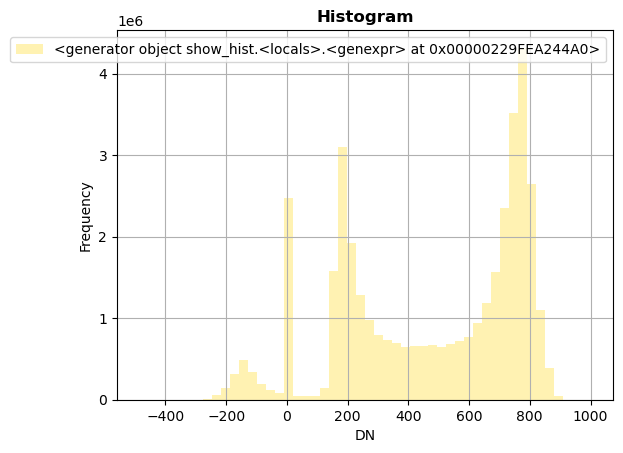

In [117]:
rasterio.plot.show_hist(clipped_img[3,:,:], bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
red_clipped = clipped_img[4].astype('f4')
nir_clipped = clipped_img[8].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)

In [119]:
ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
print(ndvi_clipped2)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [0.37675184 0.36241078 0.363047   ...        nan        nan        nan]
 [0.30763528 0.2299169  0.22580644 ...        nan        nan        nan]
 [0.33136532 0.30165586 0.22199592 ...        nan        nan        nan]]


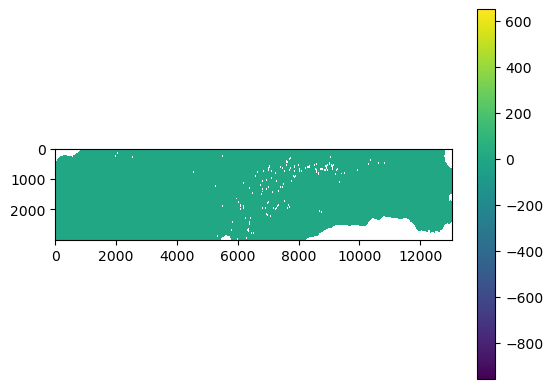

In [120]:
plt.imshow(ndvi_clipped2, cmap='viridis')
plt.colorbar()

In [125]:
red_full = full_img[1].astype('f4')
nir_full = full_img[0].astype('f4')

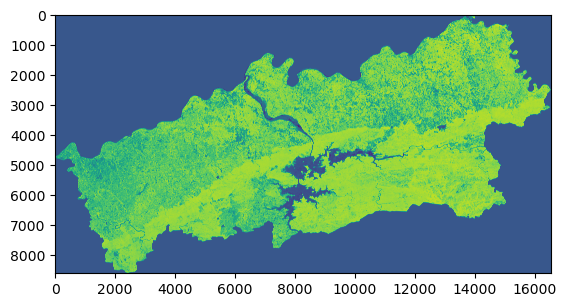

In [126]:
plt.imshow(full_img[0,:,:])

In [127]:
ndvi_full1 = np.divide(np.subtract(nir_full, red_full), np.add(nir_full, red_full))
ndvi_full2 = np.nan_to_num(ndvi_full1, nan=-1)
print(ndvi_full1)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


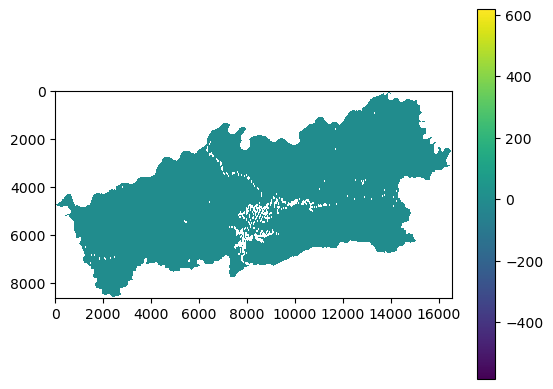

In [128]:
plt.imshow(ndvi_full1, cmap='viridis')
plt.colorbar()